In [1]:
import random
from Bio.Seq import Seq

from Bio.Align.Applications import ClustalwCommandline
help(ClustalwCommandline)

Help on class ClustalwCommandline in module Bio.Align.Applications._Clustalw:

class ClustalwCommandline(Bio.Application.AbstractCommandline)
 |  ClustalwCommandline(cmd='clustalw', **kwargs)
 |  
 |  Command line wrapper for clustalw (version one or two).
 |  
 |  http://www.clustal.org/
 |  
 |  Notes
 |  -----
 |  Last checked against versions: 1.83 and 2.1
 |  
 |  References
 |  ----------
 |  Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA,
 |  McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD,
 |  Gibson TJ, Higgins DG. (2007). Clustal W and Clustal X version 2.0.
 |  Bioinformatics, 23, 2947-2948.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import ClustalwCommandline
 |  >>> in_file = "unaligned.fasta"
 |  >>> clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file)
 |  >>> print(clustalw_cline)
 |  clustalw2 -infile=unaligned.fasta
 |  
 |  You would typically run the command line with clustalw_cline() or via
 |  the

##### Randomly generated 10 'nt' sequences of size 20 through the following function and saved in fasta file.

In [2]:
def seq(length):
    string='>'
    for i in range(length):
        string=string+random.choice(Seq('ATGC'))
    return string 

In [3]:
from Bio import SeqIO
seq=[]
for seq_record in SeqIO.parse("random.fasta", "fasta"):
    seq.append(repr(seq_record.seq))

for i in range(len(seq)):
    print(seq[i])

Seq('TCCGAGCCGACTACGCTTAC', SingleLetterAlphabet())
Seq('GCGTCCTGTAGCCTCCTTAG', SingleLetterAlphabet())
Seq('GGCCATTGTTACGCGTGACA', SingleLetterAlphabet())
Seq('TGGACCATGAGAAGCCGACT', SingleLetterAlphabet())
Seq('TATTTTTGGGGCACTACGTG', SingleLetterAlphabet())
Seq('ACTAAAAAGTAAAACGGCTT', SingleLetterAlphabet())
Seq('ATCTGGTCAAGCGCGTATAG', SingleLetterAlphabet())
Seq('GCCAGTTGCGTTCAGATATC', SingleLetterAlphabet())
Seq('CAACAATTAGTAGCGCAATG', SingleLetterAlphabet())
Seq('AGATGTCATCACGTCGGGGT', SingleLetterAlphabet())


## ClustalW

In [4]:
import os
from Bio.Align.Applications import ClustalwCommandline
clustalw_exe = r"C:/Program Files (x86)/ClustalW2/clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="random.fasta")

In [5]:
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

In [6]:
from Bio import AlignIO
align = AlignIO.read("random.aln", "clustal")
print(align)

SingleLetterAlphabet() alignment with 10 rows and 27 columns
----GCGTCCTGTAGCCTCCTTAG--- seq2
-------GCCAGTTGCGTTCAGATATC seq8
TCCGAGCCGACTACGCTTAC------- seq1
-TGGACCATGAGAAGCCGACT------ seq4
------TATTTTTGGGGCACTACGTG- seq5
--CAACAATTAGTAGCGCAATG----- seq9
--GGCCATTGTTACGCGTGACA----- seq3
--ATCTGGTCAAGCGCGTATAG----- seq7
------ACTAAAAAGTAAAACGGCTT- seq6
----AGATGTCATCACGTCGGGGT--- seq10


## Phylogenetic tree (newwick format) using the clustalW outcome

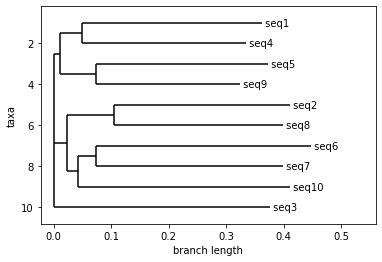

In [7]:
from Bio import Phylo
tree = Phylo.read("random.dnd", "newick")
tree.rooted=True
Phylo.draw(tree)